# Homework #1 (NEURL-GA 3042, Fall 2020)


#### LIF RC Circuit equation (according to Kirchhoff’s circuit law) is : $ \: \: \: C\frac{dV_m}{dt}=-G_L(V_m-V_L)+I\: \: \:$  , with $C=0.5nF$ \: ;  $V_{th}=-50mV \: ; \: V_{reset}=-60mV \: ; \: \tau{ref}=2ms \: ; \: G_L=0.025\mu S \: and \: V_L=-70mV$ 

#### It is a differential equation  and we can rewrite as : $\frac{dV_m}{dt}=\frac{V_{SS}-V_m}{\tau _m}$ .
#### Indeed, $\frac{dV_m}{dt} = \frac{G_L}{C}(V_L-V_m+\frac{I}{G_L})=\frac{1}{C/G_L}((V_L+\frac{I}{G_L})-V_m)$.
#### Therefore, we can identify : $\tau _m=\frac{C}{G_L}$ and $V_{SS}=V_L+\frac{I}{G_L}$
#### We can now solve this differential equation of the form : $\frac{dV_m}{dt} + p(t)V_m(t)=g(t)$ , with : $p(t)=\frac{1}{\tau_ m}$  and $g(t)=\frac{V_{SS}}{\tau_ m}$
#### The general solution for this equation is : $V_m(t)=\frac{\int \mu(t)g(t)dt + C}{\mu(t)}$ , with : $\mu(t)=e^{\int p(t)dt}=e^{\frac{t}{\tau_m}}$.
#### Finally, we have : $V_m(t)=e^{-{\frac{t}{\tau_m}}} (\int e^{\frac{t}{\tau_m}}\frac{V_{SS}}{\tau_m} dt + C)=V_{SS}+C'e^{-{\frac{t}{\tau_m}}}$
#### Using $V(0)=V_L$, we have : $\boxed{V_m(t)= V_{SS}+(V_L-V_{SS})e^{-\frac{t}{\tau_m}}}$

# Question 1:

# Part 1 :

# (a)  Simulate numerically this model with a range of I values, from 0 to 1 nA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def diff_equation (t,V_L=-70,I=0.55,G_L=0.025,C=0.5,V_0=-70):
    V_SS=V_L + I/G_L
    tau_m=C/G_L
    return (V_SS+(V_0-V_SS)*math.exp(-t/tau_m))

In [3]:
V_th=-50
V_reset=-60
tau_ref=2
V_spike = -30
V_L=-70
G_L=0.025

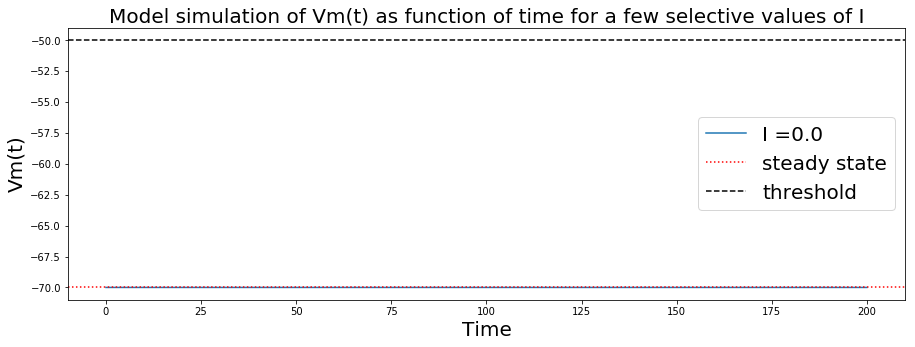

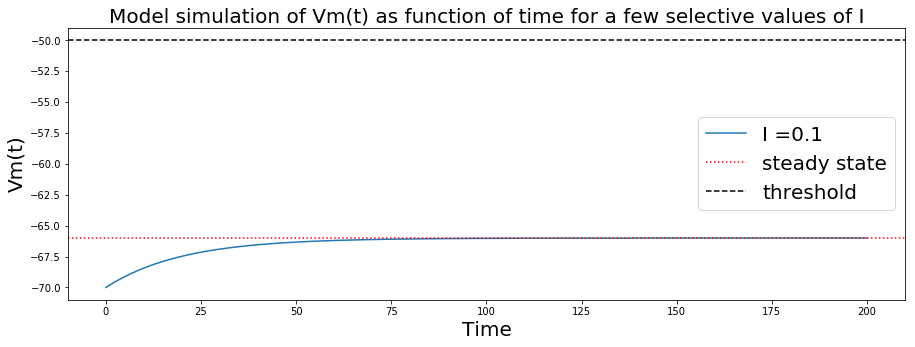

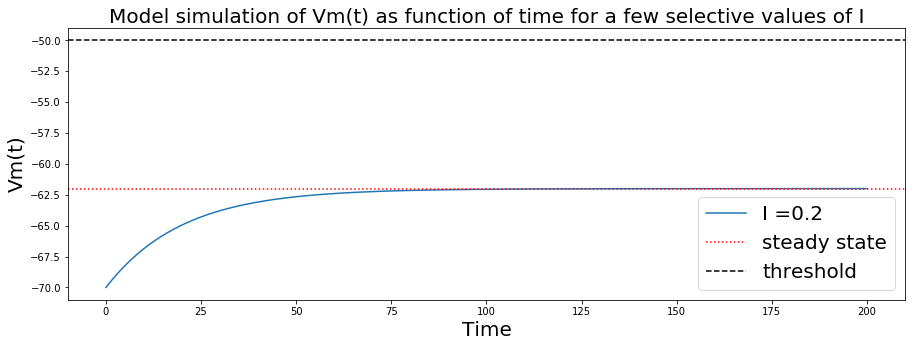

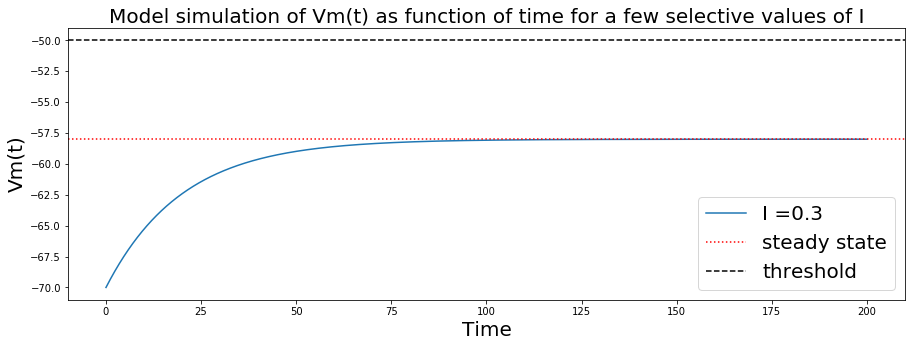

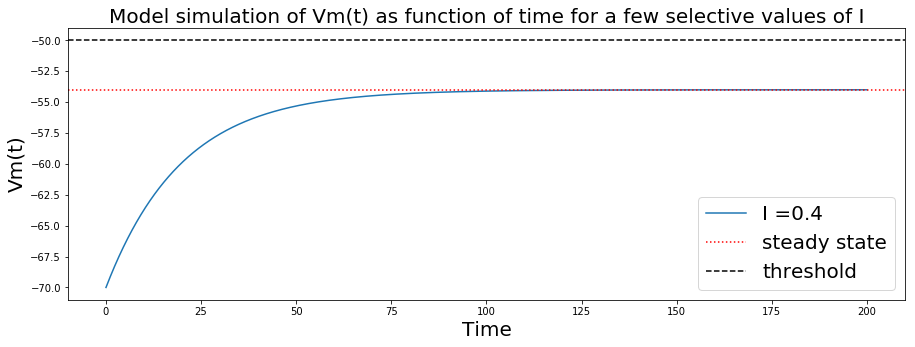

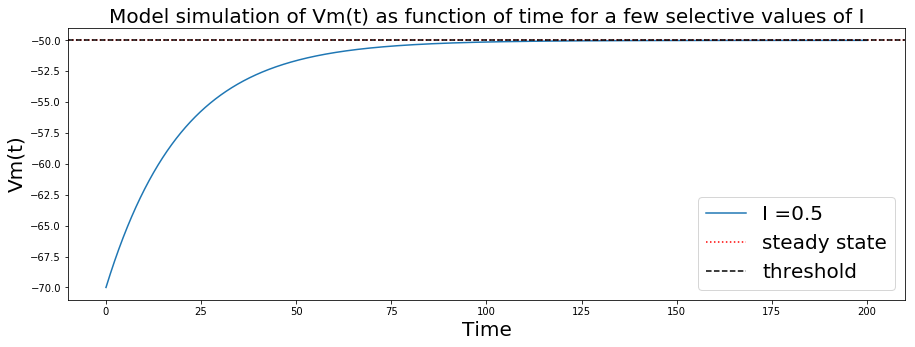

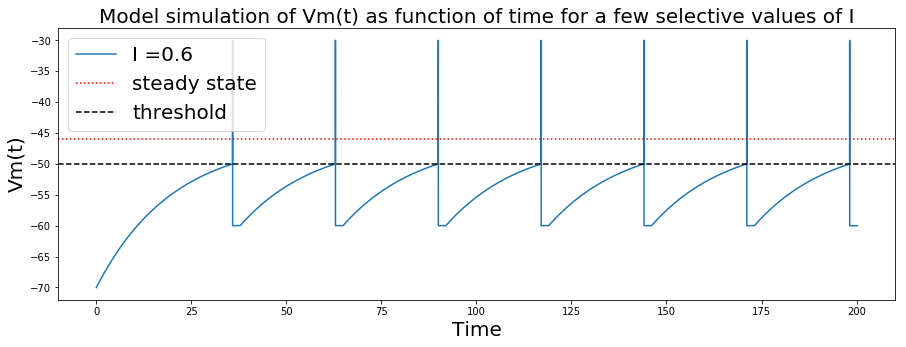

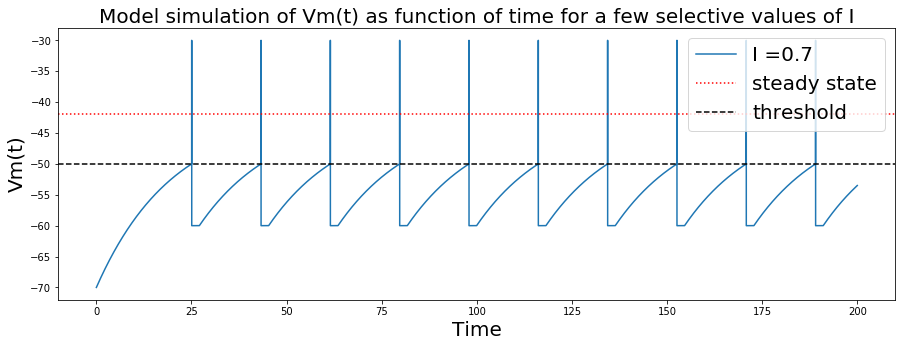

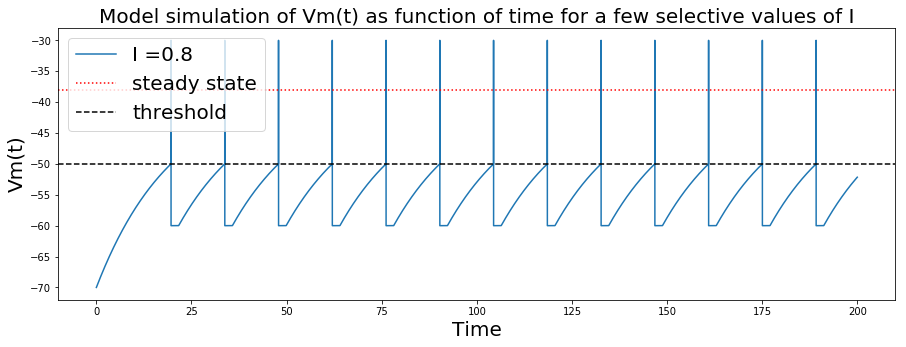

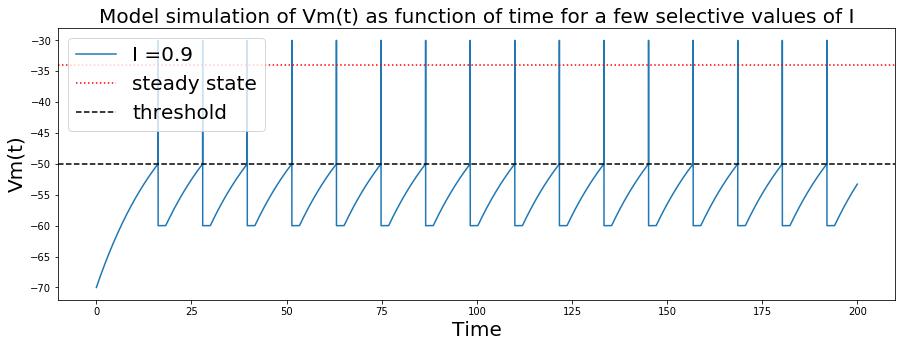

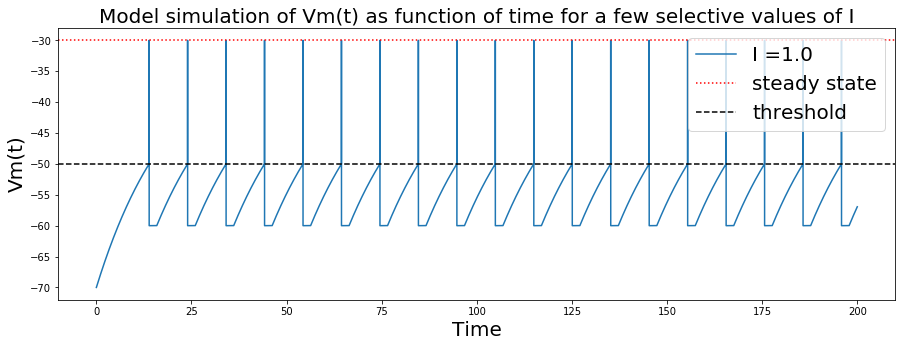

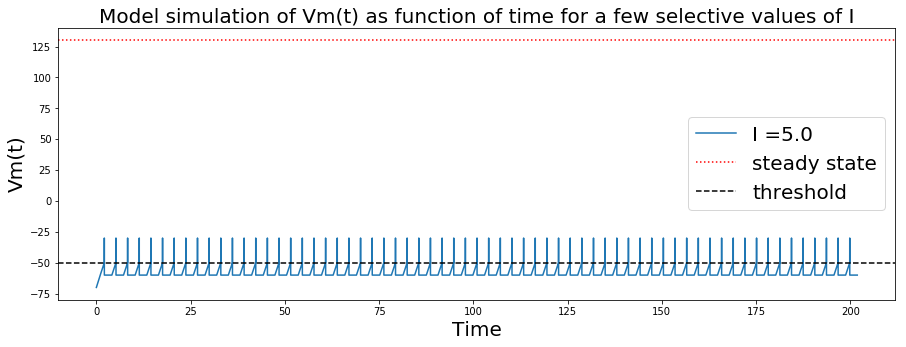

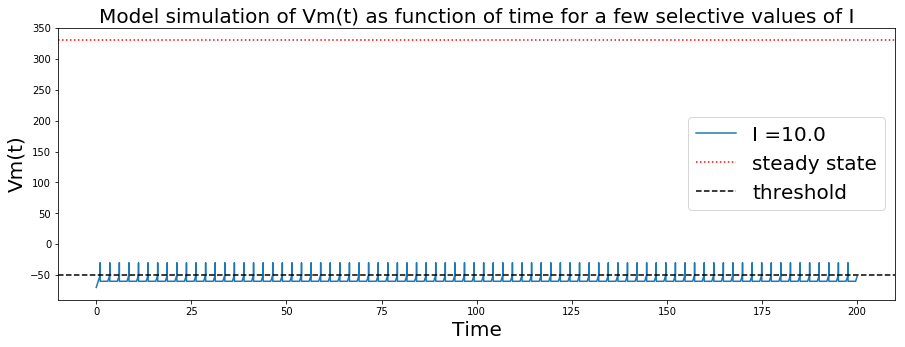

In [4]:
# Plot the differential equation for different values of I: ranging . from 0 to 10

I = np.append(np.round(np.linspace(0.0, 1.0, num=11),2),np.array([[5.0,10.0]]))

plt.rcParams["figure.figsize"] = (15,5)

for i in I :

    t=0
    solutions = []
    times = []
    V_0=-70
    time=0
    while (t<=200):
        sol_tmp = diff_equation(t=time,I=i,V_0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.01
            time = time +0.01




    #axs[num_plot%3][num_plot].plot(time, y)
    plt.plot(times, solutions,label='I =' + str(i))
    plt.axhline(y=V_L+i/G_L, color='r', linestyle='dotted',label='steady state')
    plt.axhline(y=V_th, color='black', linestyle='dashed',label='threshold')
    plt.legend(fontsize=20)
    plt.title("Model simulation of Vm(t) as function of time for a few selective values of I",fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Vm(t)',fontsize=20)
    plt.show()

#### Here, we can see that when we increase the value of I , the number of spikes increases as well . Increasing I also increases the value of the steady state . With low values of I , we will never have any firing since we do not reach the spike discharge threshold.

# Part 2 :

# (b) We fix I=0.55

In [5]:
def numerical_integration(d_t, y0=-70,V_L=-70,I=0.55,G_L=0.025,C=0.5,T=100):
    ''' numerical integration with different dt values'''
    y = y0
    sol = []
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + (d_t/C)*(-G_L*(y-V_L)+I)
        sol.append(y)
    sol =np.array(sol)
    return sol

def numerical_integrations(d_t, y0=-70,V_L=-70,I=0.55,G_L=0.025,C=0.5,T=100):
    ''' numerical integration with different dt values'''
    y = y0
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + (d_t/C)*(-G_L*(y-V_L)+I)
    return y

In [6]:
V_th=-50
V_reset=-60
tau_ref=2
V_spike = -30

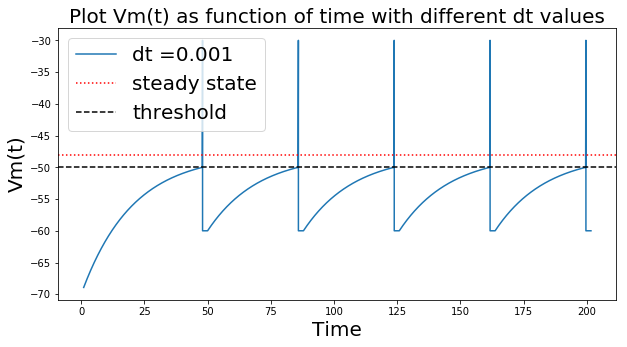

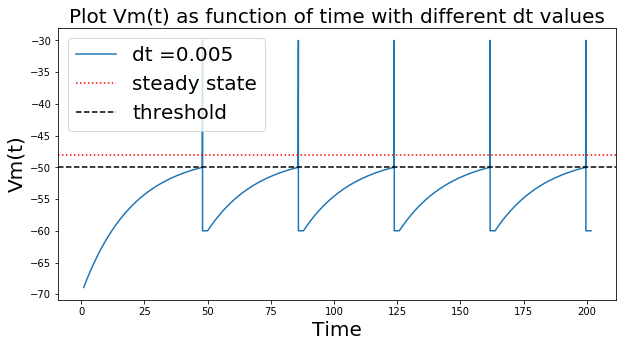

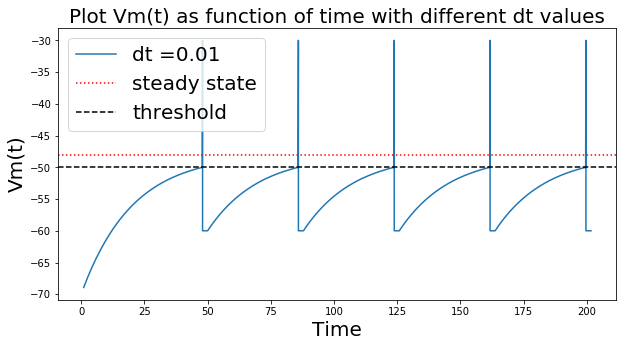

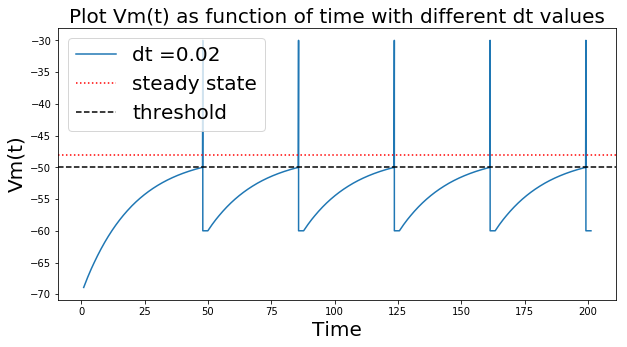

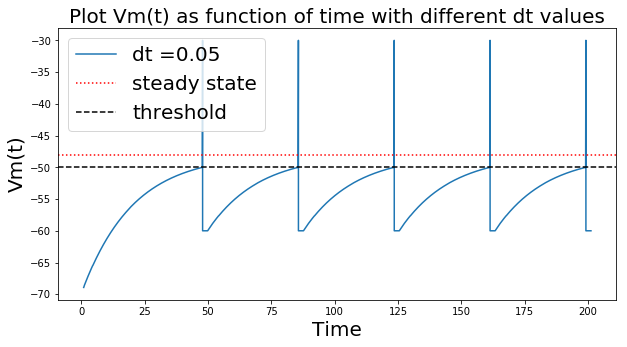

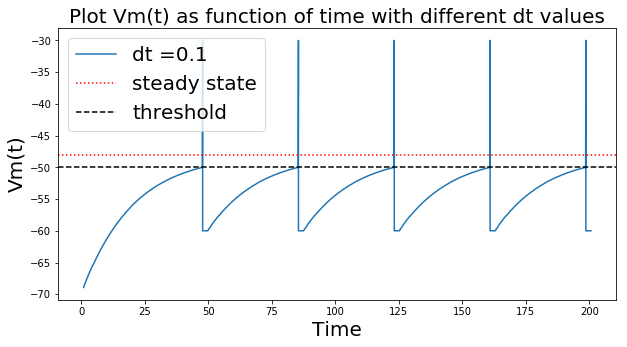

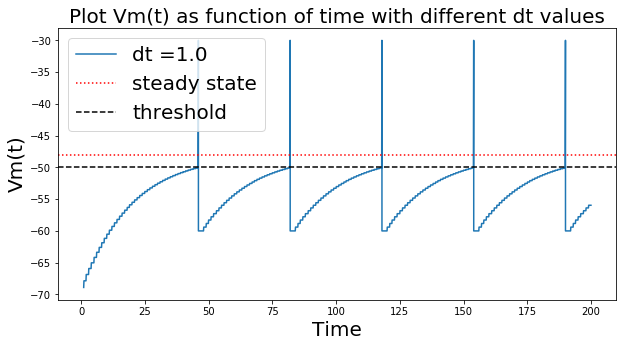

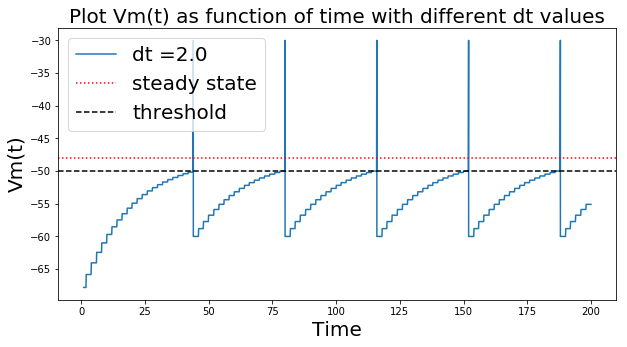

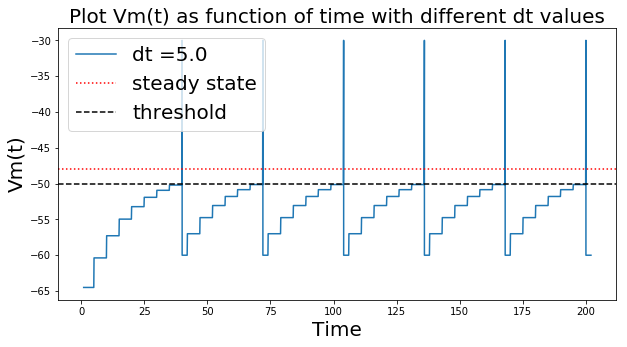

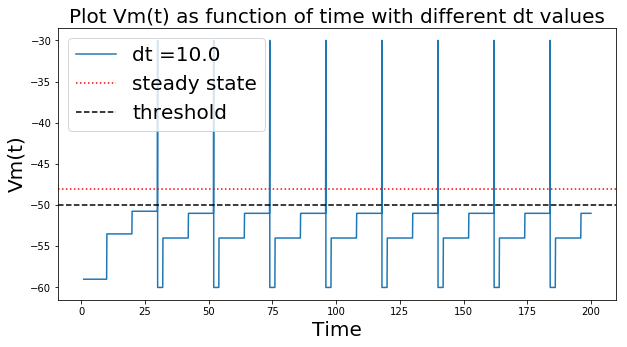

In [7]:
# Plot the differential equation for the model for different values of dt:
I = 0.55

plt.rcParams["figure.figsize"] = (10,5)

dts = np.array([0.001,0.005,0.01,0.02,0.05,0.1,1,2,5,10])
for dt in dts:

    t=1
    solutions = []
    times = []
    V_0=-70
    time=1
    while (t<=200):
        sol_tmp = numerical_integrations(d_t=dt,T=time,I=I,y0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.1
            time = time +0.1


    plt.plot(times, solutions,label='dt =' + str(dt))
    plt.axhline(y=V_L+I/G_L, color='r', linestyle='dotted',label='steady state')
    plt.axhline(y=V_th, color='black', linestyle='dashed',label='threshold')
    plt.legend(fontsize=20)
    plt.title("Plot Vm(t) as function of time with different dt values",fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.ylabel('Vm(t)',fontsize=20)
    plt.show()



# Curiosity : Differential equations without the spikes and resets :

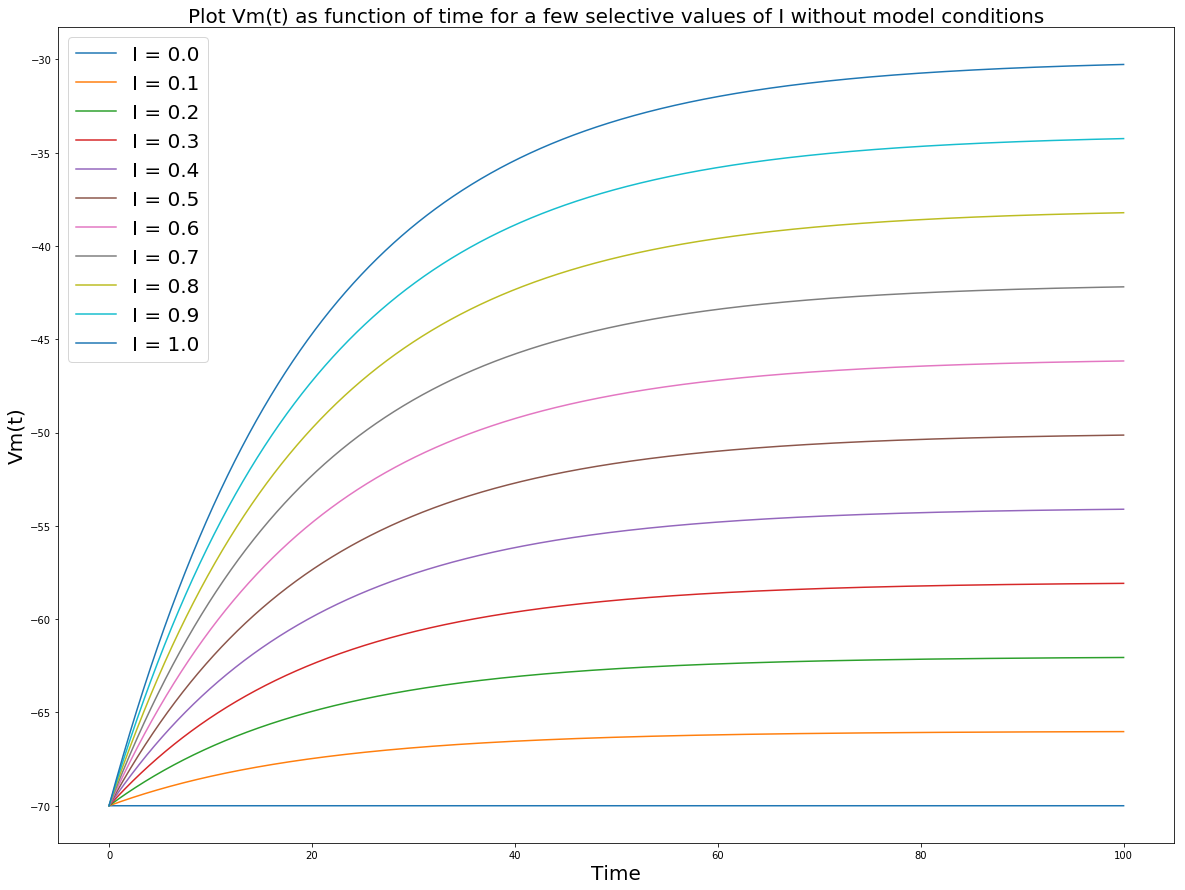

In [8]:
# Plot the differential equation for different values of I:
I = np.round(np.linspace(0.0, 1.0, num=11),2)
#I = [0,0.1,0.01,0.001,0.0001,0.00001,1]
plt.rcParams["figure.figsize"] = (20,15)
for i in I:
    time = np.linspace(0.0, 100, num=10000)
    
    y = [diff_equation(t=t,I=i) for t in time]
    #axs[num_plot%3][num_plot].plot(time, y)
    plt.plot(time, y,label="I = "+ str(i))
plt.legend(fontsize=20)
plt.title("Plot Vm(t) as function of time for a few selective values of I without model conditions",fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Vm(t)',fontsize=20)
plt.show()

#### As expected , the value of Vm is constant when I=0 and is equal to V_0=V_L since no courant is applied . As I increases, the value of Vm increase as well .
#### We will have to monitor the value of I because it will determine whether or not the membrane potential reaches a steady state .

#### 1. For fixed I=0.55, we have : $V_{SS}=V_L+\frac{I}{G_L}=-70+\frac{0.55}{0.025}=-48 < 50$
#### Also, $\tau_m=\frac{C}{G_L}=\frac{0.5}{0.025}=20$

In [9]:
def numerical_integration(d_t, y0=-70,V_L=-70,I=0.55,G_L=0.025,C=0.5,T=100):
    ''' numerical integration with different dt values'''
    y = y0
    sol = []
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + (d_t/C)*(-G_L*(y-V_L)+I)
        sol.append(y)
    sol =np.array(sol)
    return sol

# a) We use different time step :

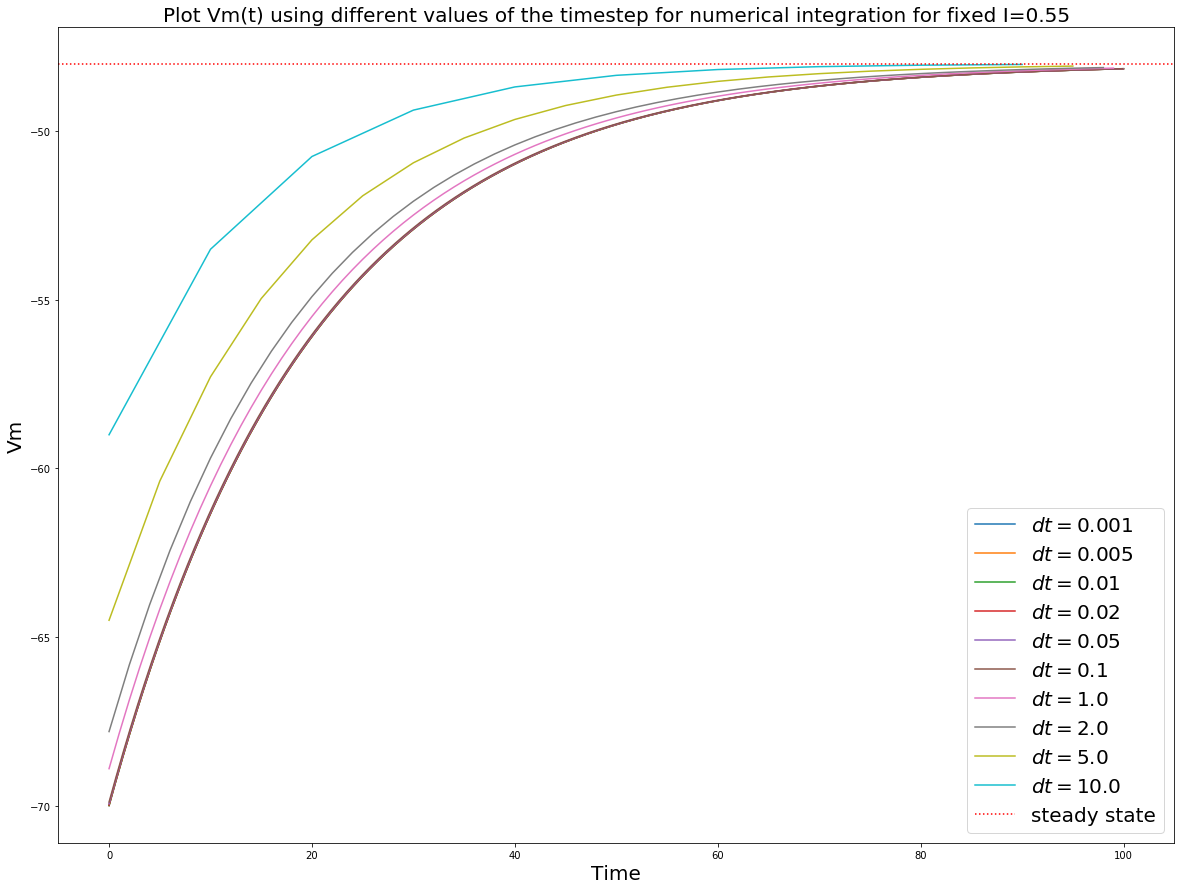

In [10]:



plt.rcParams["figure.figsize"] = (20,15)
T=100
solutions = []
times = []
np.array([0.001,0.005,0.01,0.02,0.05,0.1,1,2,5,10])
y0 = -70
for dt in dts:
    time = np.arange(0,T, dt)
    sol_integration = numerical_integration(d_t=dt, y0=y0,T=T)
    solutions.append(sol_integration)
    times.append(time)
l = 0
for time,sol in zip(times,solutions):    
    plt.plot(time, sol, label = r'$dt=$'+str(dts[l]))
    l+=1
plt.title("Plot Vm(t) using different values of the timestep for numerical integration for fixed I=0.55",fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.axhline(y=-48, color='r', linestyle='dotted',label='steady state')
plt.legend(fontsize=20)
#plt.ylim(-75,-45)
plt.ylabel('Vm',fontsize=20)
plt.show()

# b) We compare with the real solution of the differential equation

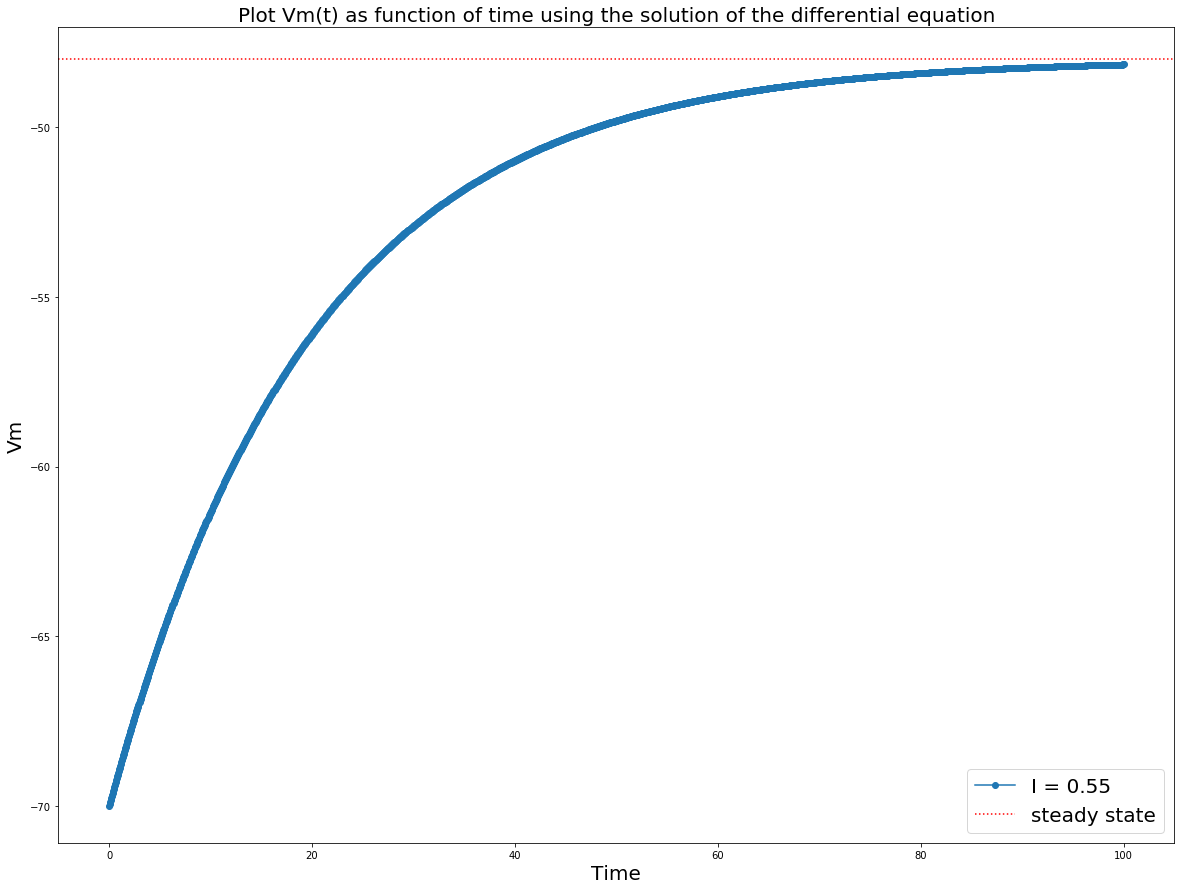

In [11]:
I=0.55
plt.rcParams["figure.figsize"] = (20,15)

time = np.linspace(0,100,2000)
y = [diff_equation(t,I=0.55) for t in time]
y
#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(time, y,label="I = "+ str(I),marker='o')
plt.title("Plot Vm(t) as function of time using the solution of the differential equation",fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.axhline(y=-48, color='r', linestyle='dotted',label='steady state')
plt.legend(fontsize=20)
#plt.ylim(-75,-45)
plt.ylabel('Vm',fontsize=20)
plt.show()

#### As we can see here, for .  I=0.55 , the value of the steady state is -48 and using low timestep gives us accurate results . Above dt=1, the results start to oscillate and become less and less accurate . It is therefore suggested to use low values for the timestep. In plot b) we also validate what we saw in class that whenever t is greater than $4 \: or \: 5\tau=80 \: to \:100$ ,  we reach the steady state .

#### As we can see, when there is no condition applied  and I is fixed, Vm increases a lot at the beginning until it reaches 4-5 $\tau_m$ where it reaches its steady state .

# Question 2 : 


#### In order to find $I_C$, we set : $V_{SS}=V_{th}$ i.e $V_L+\frac{I}{G_L}=V_{th}$ . Indeed, if $I>_IC$, it will be above this threshold leading to repetitive firing spikes for the neuron model. If $I>_IC$,the membrane potential will reach a steady state.
#### Therefore, $\boxed{I_C=G_L(V_{th}-V_L)=0.025*(-50--70)=0.025*20=0.5}$. The value is consistent with question 1.
#### We have that the firing rate : f = 1/T, where T is a constant periodicity or inter-spike interval and we know that : $V_{th}=V_m(T-\tau_{ref})$.
#### Therefore, $V_{SS}+(V_0-V_{SS}) \exp{(-\frac{T-\tau_{ref}}{\tau_m})=V_{th}}$
#### $\Rightarrow (V_0-V_{SS}) \exp{(-\frac{T}{\tau_m})} \exp{(\frac{\tau_{ref}}{\tau_m})}=(V_{th}-V_{SS})$
#### $ \exp{(\frac{-T}{\tau_m})}=\frac{(V_{th}-V_{SS})}{(V_0-V_{SS})}\exp{(\frac{-\tau_{ref}}{\tau_m})}$
#### $ \frac{-T}{\tau_m}= ln(\frac{(\: V_{th}-V_{SS}\:)}{( \: V_0-V_{SS} \: )})-\frac{\tau_{ref}}{\tau_m}$
#### $ T= \tau_m  ln(\frac{(\: V_0-V_{SS}\:)}{( \: V_{th}-V_{SS} \: )})+\tau_{ref}$.
#### With  $\tau_m=C/G_L$ ; $V_{SS} = V_L + I/G_L$ and $V_0=V_{reset}$ :
#### Therefore, the analytical solution is : $\: \: \boxed{T= \begin{Bmatrix}
\tau_{ref}+ (C/G_L) ln(1 + ((G_L \Delta_V)/(I-I_C))) \:  \: ; \: I > I_C
\\ 
0
\end{Bmatrix}}$  ; $\Delta_v= V_{th}-V_{reset}$
#### and the firing rate f=1/T

# Numerical Solving :

In [12]:
dt = 0.01
I = np.round(np.linspace(0.0, 1, num=50),2)
periods = []
run_time = 200
for i in I :
    t=1
    solutions = []
    times = []
    V_0=-70
    time=1
    while (t<=run_time):
        sol_tmp = numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.1
            time = time +0.1
    f=np.array(solutions)
    g=np.array([V_th]*len(solutions))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    periods.append(len(idx)/2)


/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


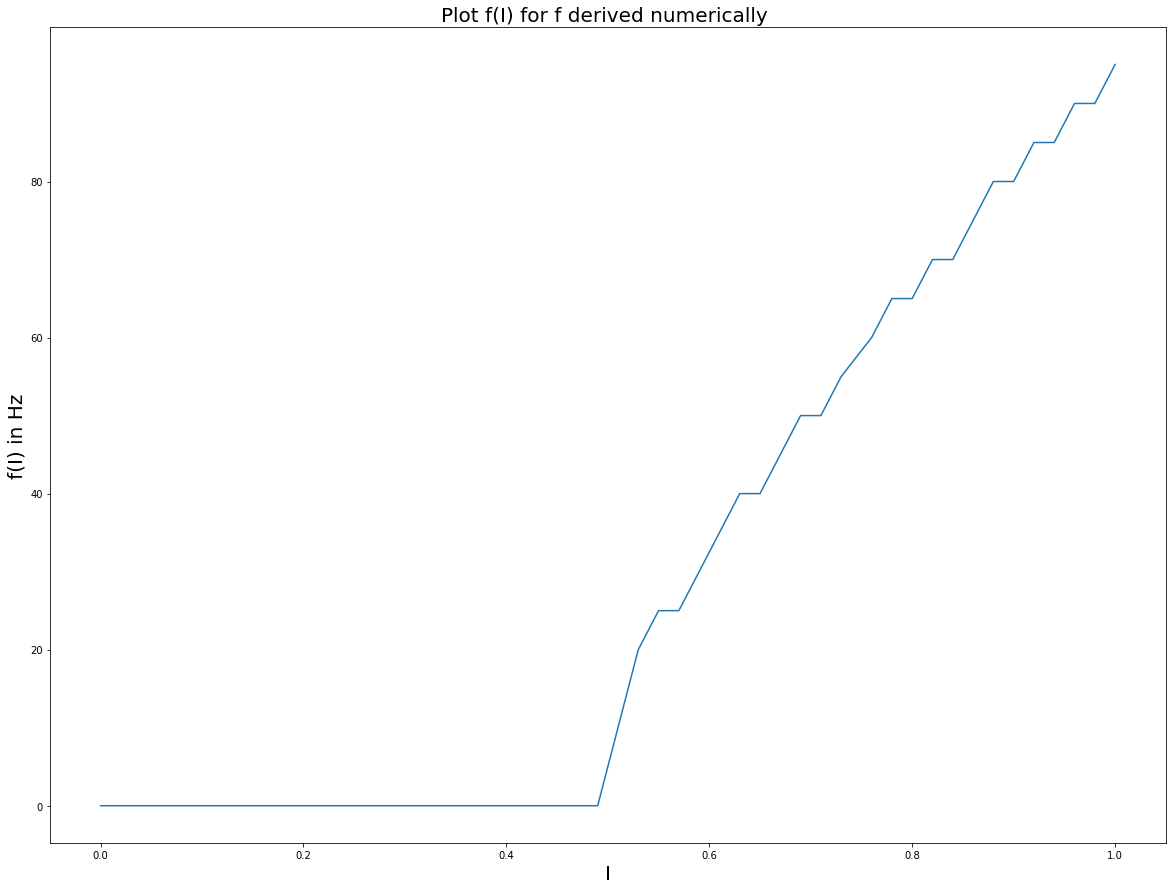

In [13]:
run_time=200
firing = 1000/(run_time/np.array(periods))
plt.rcParams["figure.figsize"] = (20,15)

#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, firing)

plt.title("Plot f(I) for f derived numerically ",fontsize=20)
#plt.axhline(y=1000/tau_ref, color='r', linestyle='dotted',label='maximum firing rate = 1/tau=500 Hz')
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
#plt.legend(fontsize=20)
plt.show()

In [14]:
dt = 0.01
I = np.round(np.linspace(0.0, 100, num=10),2)
periodss = []
run_time = 200
for i in I :
    t=1
    solutions = []
    times = []
    V_0=-70
    time=1
    while (t<=run_time):
        sol_tmp = numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.1
            time = time +0.1
    f=np.array(solutions)
    g=np.array([V_th]*len(solutions))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    periodss.append(len(idx)/2)


/Users/taziy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


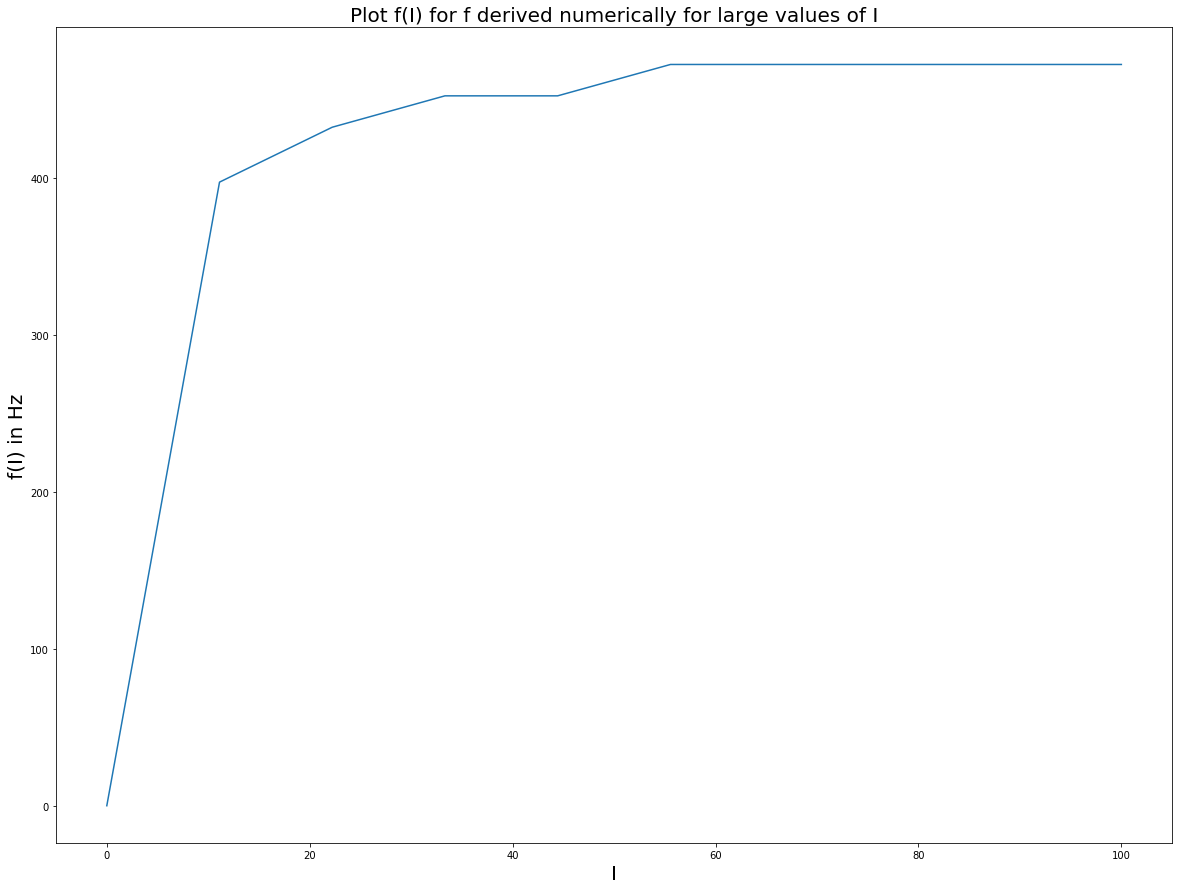

In [15]:
run_time=200
firings = 1000/(run_time/np.array(periodss))
plt.rcParams["figure.figsize"] = (20,15)

#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, firings)

plt.title("Plot f(I) for f derived numerically for large values of I",fontsize=20)
#plt.axhline(y=1000/tau_ref, color='r', linestyle='dotted',label='maximum firing rate = 1/tau=500 Hz')
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
#plt.legend(fontsize=20)
plt.show()

# Analytical solving

In [16]:
V_th=-50
V_reset=-60
tau_ref=2
V_spike = -30
V_L=-70
G_L=0.025
C = 0.5
I_C = G_L*(V_th-V_L)
Delta_V = V_th - V_reset

In [17]:
def analytic_firing(I=0.55):
    if (I>I_C):
        return 1000*(1/(tau_ref + (C/G_L)*math.log(1 + ((G_L*Delta_V)/(I-I_C)))))
    else :
        return(0)

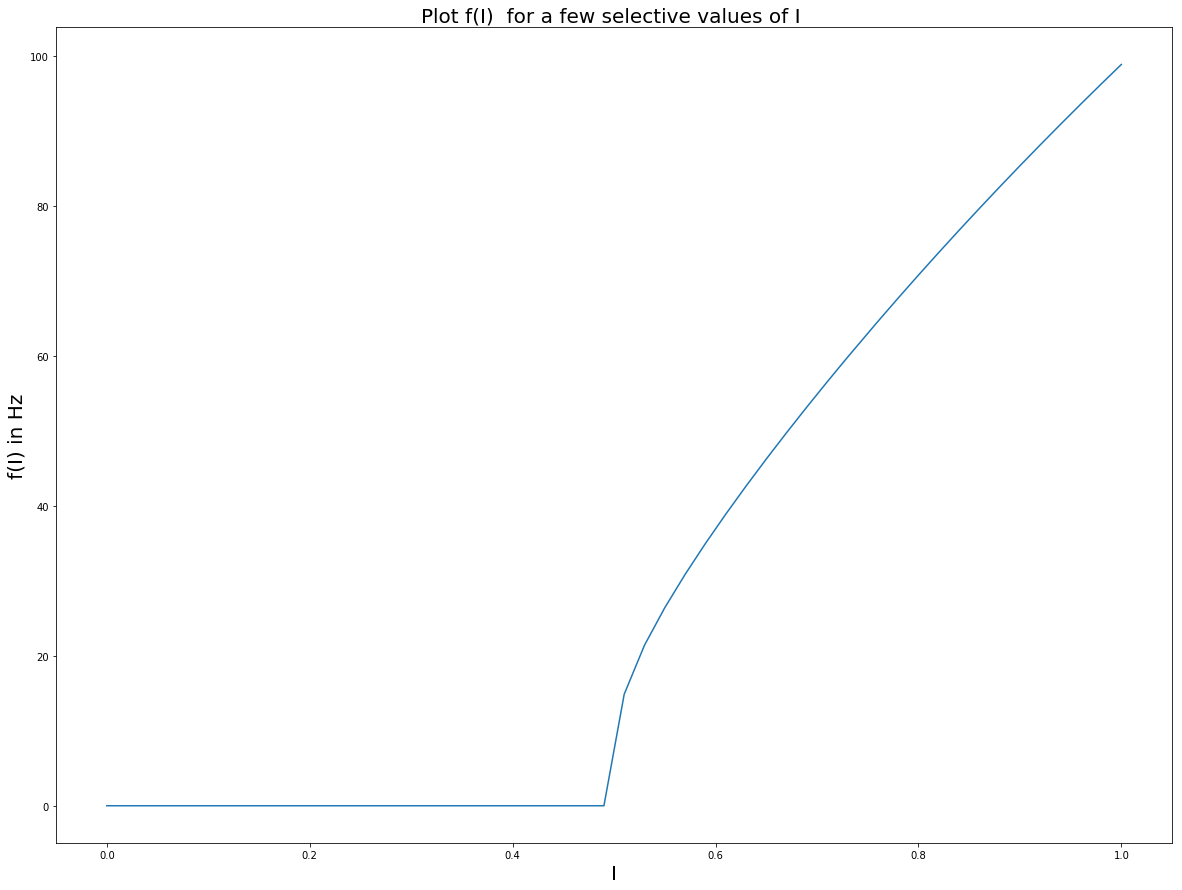

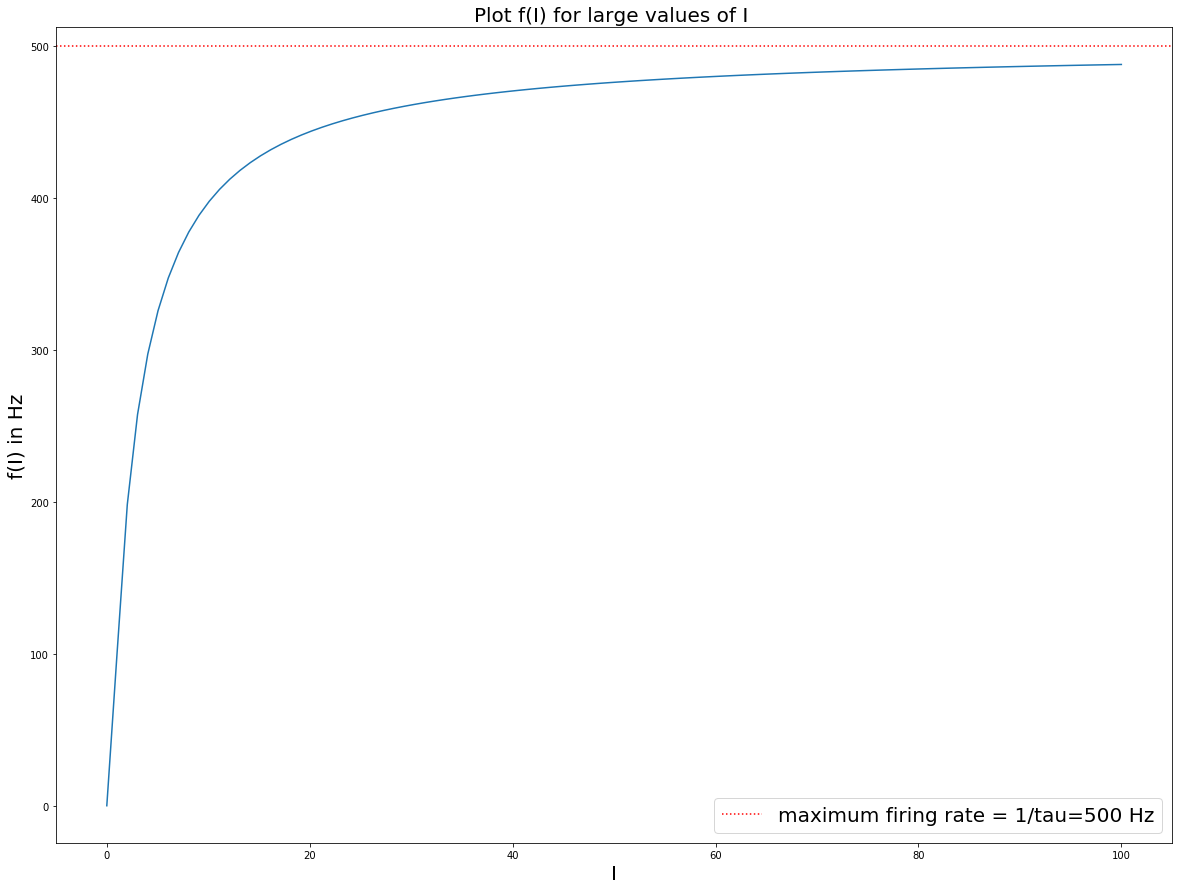

In [18]:
I = np.round(np.linspace(0.0, 1, num=50),2)
#I = [0,0.1,0.01,0.001,0.0001,0.00001,1]
plt.rcParams["figure.figsize"] = (20,15)
y = [analytic_firing(I=i) for i in I]
#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, y)

plt.title("Plot f(I)  for a few selective values of I ",fontsize=20)
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
plt.show()


# Check for high values of I :

I = np.round(np.linspace(0.0, 100.0, num=100),2)
#I = [0,0.1,0.01,0.001,0.0001,0.00001,1]
plt.rcParams["figure.figsize"] = (20,15)
y = [analytic_firing(I=i) for i in I]
#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, y)

plt.title("Plot f(I) for large values of I ",fontsize=20)
plt.axhline(y=1000/tau_ref, color='r', linestyle='dotted',label='maximum firing rate = 1/tau=500 Hz')
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Analytical and numerical solution together :

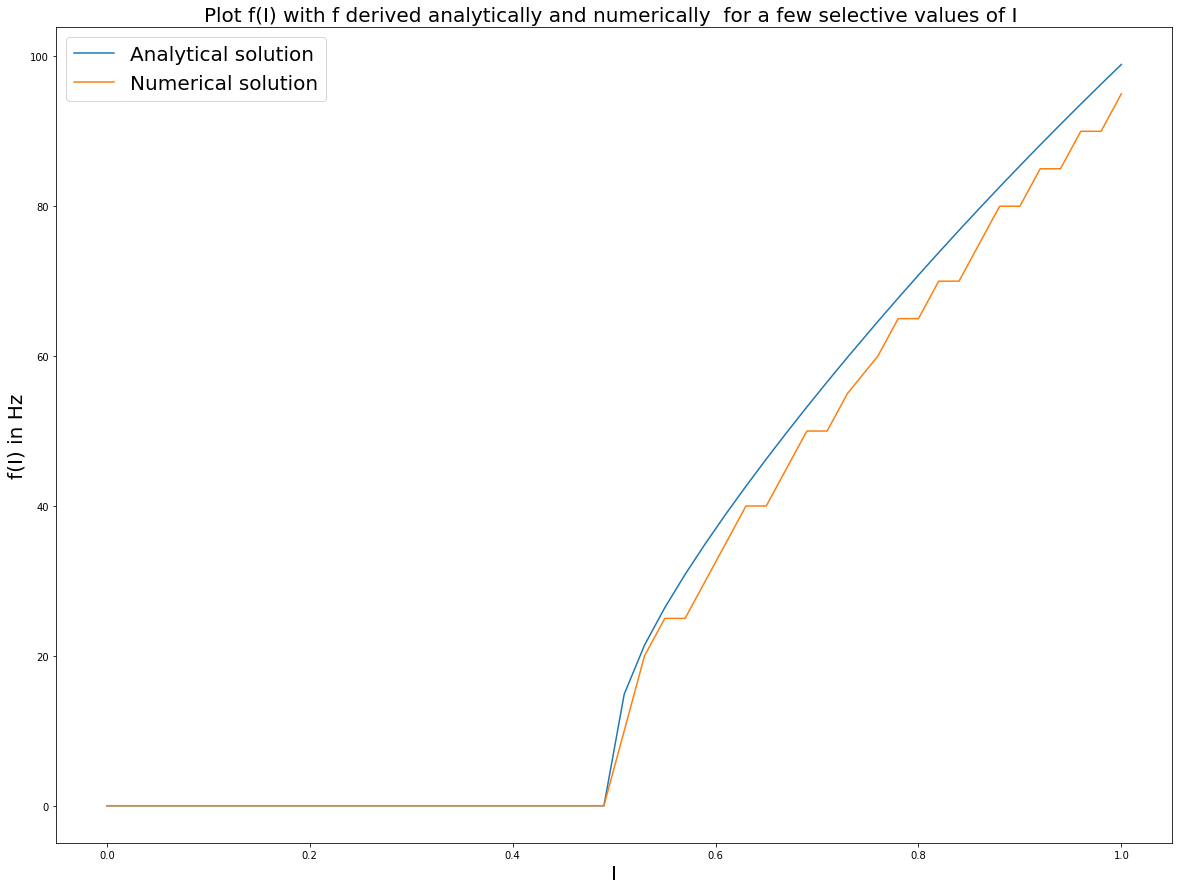

In [19]:
I = np.round(np.linspace(0.0, 1, num=50),2)
plt.rcParams["figure.figsize"] = (20,15)
y = [analytic_firing(I=i) for i in I]
#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, y,label='Analytical solution')
plt.plot(I, firing, label='Numerical solution')
plt.title("Plot f(I) with f derived analytically and numerically  for a few selective values of I ",fontsize=20)
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
plt.legend(fontsize=20)
plt.show()

#### The numerical and analytical solution are concordant and validate what we have seen in class : 
#### "For the LIF model, the firing rate starts at zero at Iapp = Ic, and increases steeply near Ic (in fact, the slope of r(I) is infinity at Iapp = Ic). Well above Ic, one can show from Eq. (4) that r is approximately linear with I, with a slope given by 1/Cm∆V . At very largeI, r cannot exceed 1/τref because ISI must be longer than the refractory period, therefore the firing rate eventually plateaus. With τref = 2 ms, the maximum firing rate is 1/τref = 500 Hz."

# Question 3:

# (a)

In [20]:


def noise_numerical_integrations(d_t, y0=-70,V_L=-70,I=0.55,G_L=0.025,C=0.5,T=100,sigma=0.3):
    ''' numerical integration with different dt values'''
    np.random.seed(1)
    y = y0
    time = np.arange(0,T, d_t)
    for t in time:
        y=y + (d_t/C)*(-G_L*(y-V_L)+I)+(sigma/C)*math.sqrt(d_t)*np.random.normal(0,1)
    return y

In [21]:
V_th=-50
V_reset=-60
tau_ref=2
V_spike = -30
V_L=-70
G_L=0.025

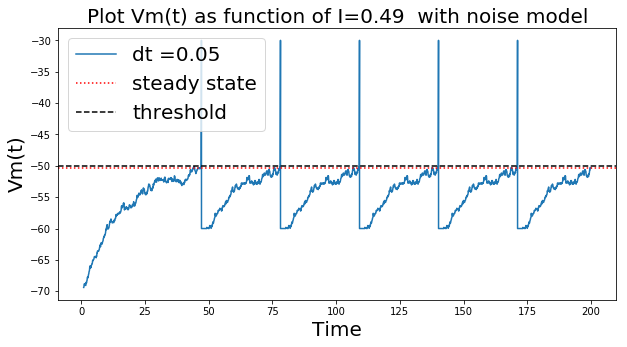

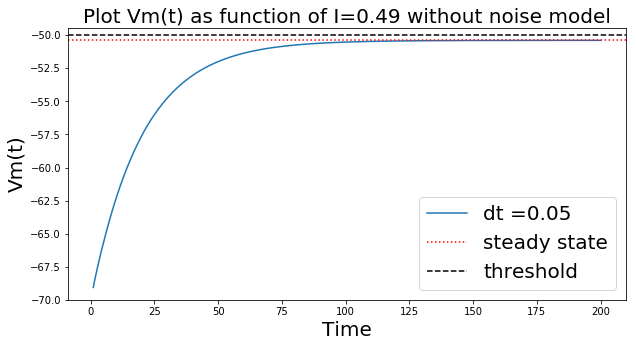

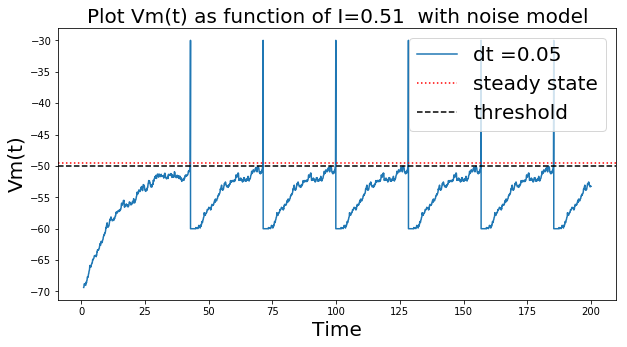

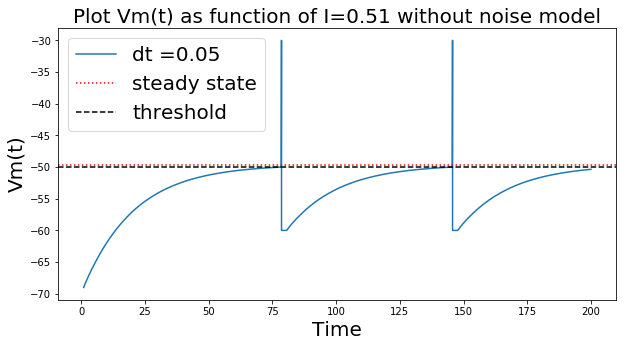

In [22]:


plt.rcParams["figure.figsize"] = (10,5)

dt=0.05
I = [0.49,0.51]
for i in I:
    for count in [1,2]:
        t=1
        solutions = []
        times = []
        V_0=-70
        time=1
        while (t<=200):
            sol_tmp = noise_numerical_integrations(d_t=dt,T=time,I=i,y0=V_0) if count%2==1 else  numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
            if(sol_tmp>V_th):
                solutions.append(V_spike)
                solutions.append(V_reset)
                solutions.append(V_reset)
                times.append(t)
                times.append(t+0.01)
                times.append(t+tau_ref)
                t = t+tau_ref
                V_0=V_reset
                time=0
            else :
                solutions.append(sol_tmp)
                times.append(t)
                t = t+0.1
                time = time +0.1

        title = 'Plot Vm(t) as function of I=' + str(i) +'  with noise model' if count%2==1 else  'Plot Vm(t) as function of I=' + str(i) +' without noise model'
        title_more = title + 'below Icrit'  if i<0.5 else title + 'above Icrit' 
        plt.plot(times, solutions,label='dt =' + str(dt))
        plt.axhline(y=V_L+i/G_L, color='r', linestyle='dotted',label='steady state')
        plt.axhline(y=V_th, color='black', linestyle='dashed',label='threshold')
        plt.legend(fontsize=20)
        plt.title(title,fontsize=20)
        plt.xlabel('Time',fontsize=20)
        plt.ylabel('Vm(t)',fontsize=20)
        plt.show()


#### As expected, with the noise , the pattern has changed and the neuron can fire even below Icrit due to the increase values of Vm produced by the noise introduced. Comparing the model with and without noise all things equal shows how different the two models can be as soon as we introduce some noise. 

# (b)

In [35]:
dt = 0.01
I = np.round(np.linspace(0.0, 1, num=10),2)
periods = []
run_time = 200
for i in I :
    t=1
    solutions = []
    times = []
    V_0=-70
    time=1
    while (t<=run_time):
        sol_tmp = noise_numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.1
            time = time +0.1
    f=np.array(solutions)
    g=np.array([V_th]*len(solutions))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    periods.append(len(idx)/2)

periods_no_noise = []
run_time = 200
for i in I :
    t=1
    solutions = []
    times = []
    V_0=-70
    time=1
    while (t<=run_time):
        sol_tmp = numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
        if(sol_tmp>V_th):
            solutions.append(V_spike)
            solutions.append(V_reset)
            solutions.append(V_reset)
            times.append(t)
            times.append(t+0.01)
            times.append(t+tau_ref)
            t = t+tau_ref
            V_0=V_reset
            time=0
        else :
            solutions.append(sol_tmp)
            times.append(t)
            t = t+0.1
            time = time +0.1
    f=np.array(solutions)
    g=np.array([V_th]*len(solutions))
    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    periods_no_noise.append(len(idx)/2)

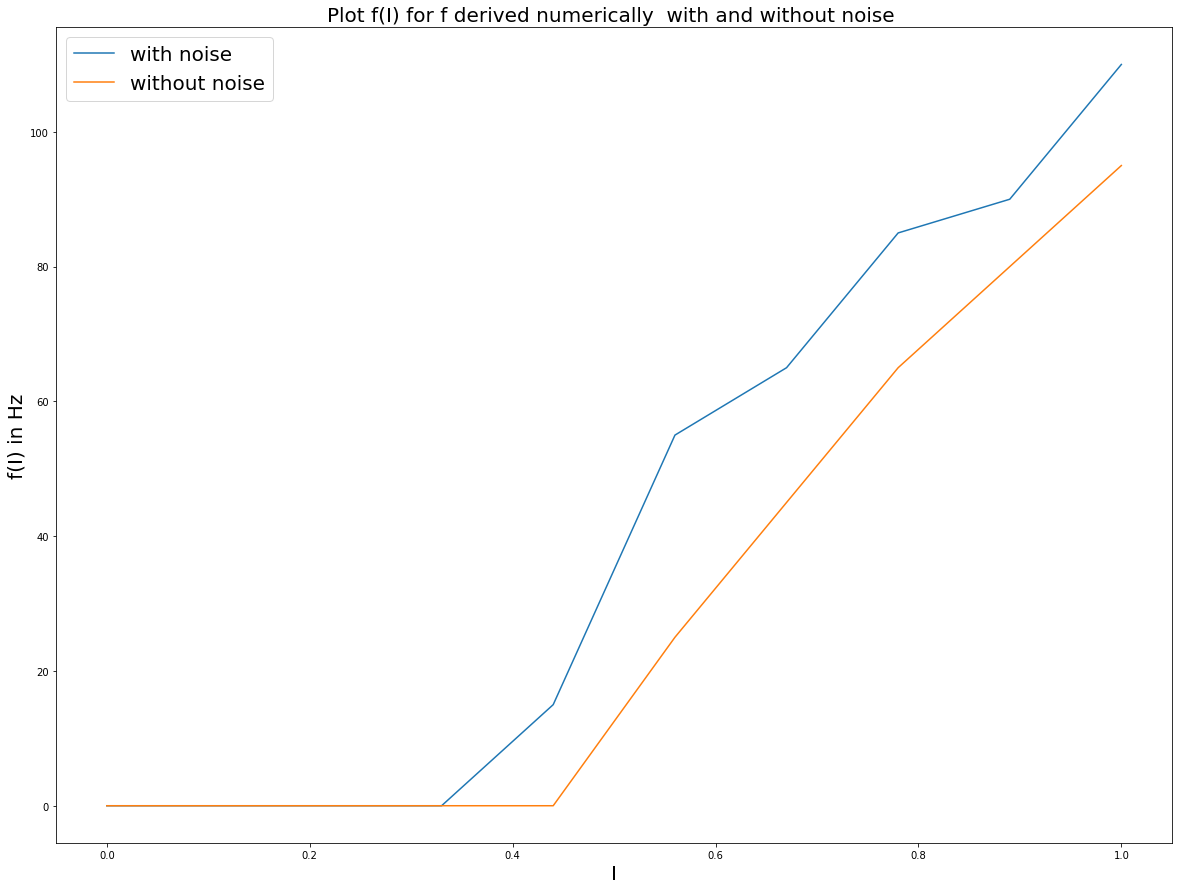

In [36]:
run_time=200
firing = 1000/(run_time/np.array(periods))
firing_no_noise = np.array(1000/(run_time/np.array(periods_no_noise)))
plt.rcParams["figure.figsize"] = (20,15)

#axs[num_plot%3][num_plot].plot(time, y)
plt.plot(I, firing,label='with noise')
plt.plot(I, firing_no_noise,label='without noise')

plt.title("Plot f(I) for f derived numerically  with and without noise ",fontsize=20)
#plt.axhline(y=1000/tau_ref, color='r', linestyle='dotted',label='maximum firing rate = 1/tau=500 Hz')
plt.xlabel('I',fontsize=20)
plt.ylabel('f(I) in Hz',fontsize=20)
plt.legend(fontsize=20)
plt.show()

#### This validates previous observation and shows that for the noise model, the firing starts with lower values of I.

# (c)

In [37]:
dt = 0.1
I = np.round(np.linspace(0.0, 10, num=200),2)

firings =[]
CV  = []
runs = [1,2,5,10,20,50,100,200]
for i in I :
    interspike_intervals = []
    fires = []
    for run in runs :
        
        t=0
        solutions = []
        times = []
        V_0=-70
        time=0
        while (t<=run):
            sol_tmp = noise_numerical_integrations(d_t=dt,T=time,I=i,y0=V_0)
            if(sol_tmp>V_th):
                solutions.append(V_spike)
                solutions.append(V_reset)
                solutions.append(V_reset)
                times.append(t)
                times.append(t+0.01)
                times.append(t+tau_ref)
                t = t+tau_ref
                V_0=V_reset
                time=0
            else :
                solutions.append(sol_tmp)
                times.append(t)
                t = t+0.1
                time = time +0.1
        f=np.array(solutions)
        g=np.array([V_th]*len(solutions))
        idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
        interspike_intervals.append(run/(len(idx)/2)) if (len(idx))>1 else interspike_intervals.append(0)
        fires.append(1000/(run/(len(idx)/2))) if (len(idx))>1 else fires.append(0)
    firings.append(np.mean(fires))
    CV.append(np.std(fires)/np.mean(fires)) if (len(idx))>1 else CV.append(1)


No handles with labels found to put in legend.


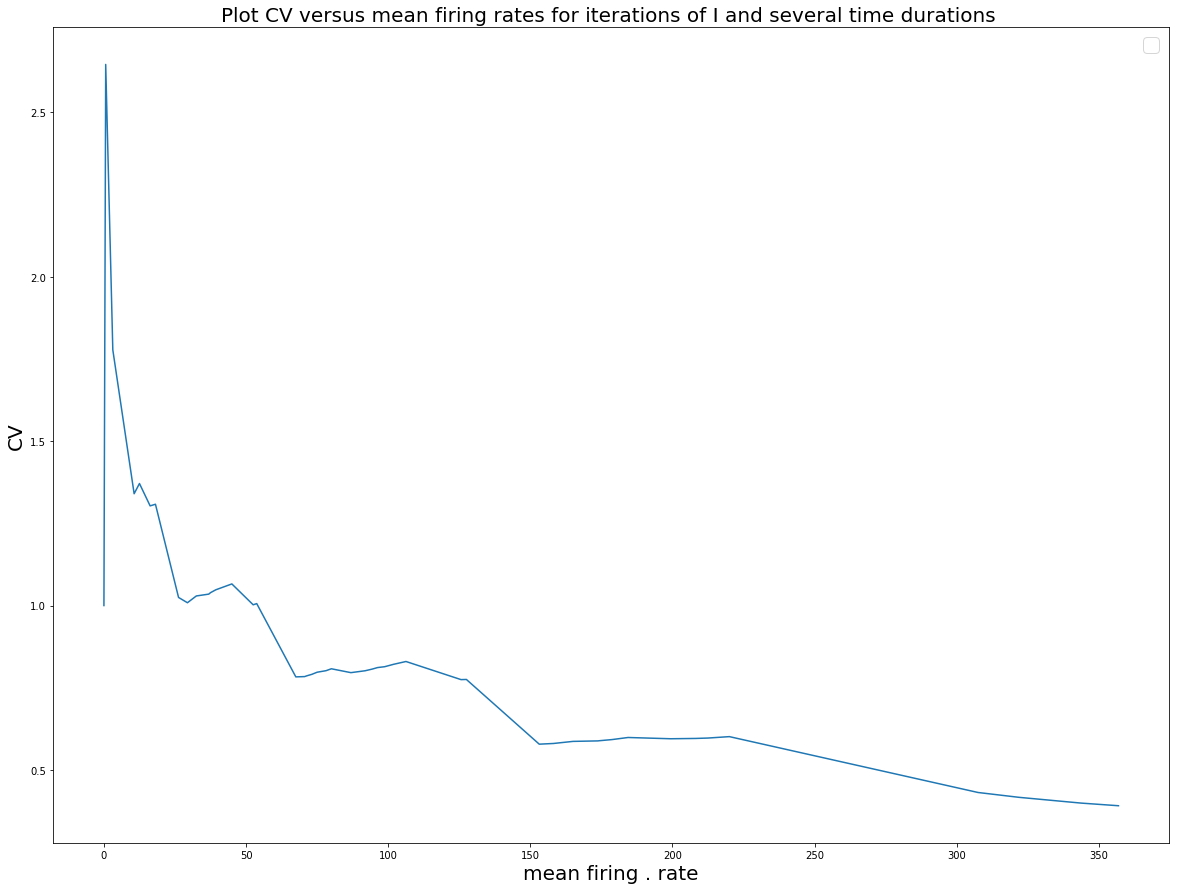

In [38]:
plt.plot(firings,CV)
plt.title("Plot CV versus mean firing rates for iterations of I and several time durations ",fontsize=20)
#plt.axhline(y=1000/tau_ref, color='r', linestyle='dotted',label='maximum firing rate = 1/tau=500 Hz')
plt.xlabel('mean firing . rate',fontsize=20)
plt.ylabel('CV',fontsize=20)
plt.legend(fontsize=20)
plt.show()


#### We validate the general pattern with some noise at the beginning . Indeed, we can see that when the firing rate increases, the CV decreases.